In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

# Expand cell and pandas width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])

In [3]:
train.shape

(10886, 12)

## Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [4]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
# dataset에서 null 개수 체크
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

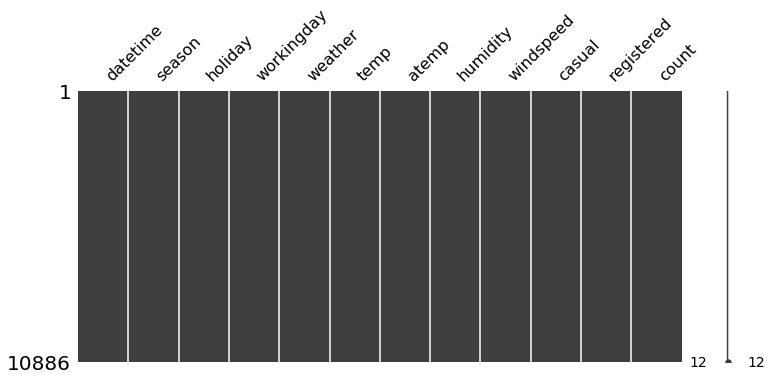

In [6]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [7]:
# 온도 (temp)가 중요한 변수이지 않을까 해서 통계치를 살펴봄
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

# datetime을 쪼개서 각각 어떤 상관관계가 있는지 살펴보자.


In [8]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5,0,'hour'), Text(0.5,1,'count per hour')]

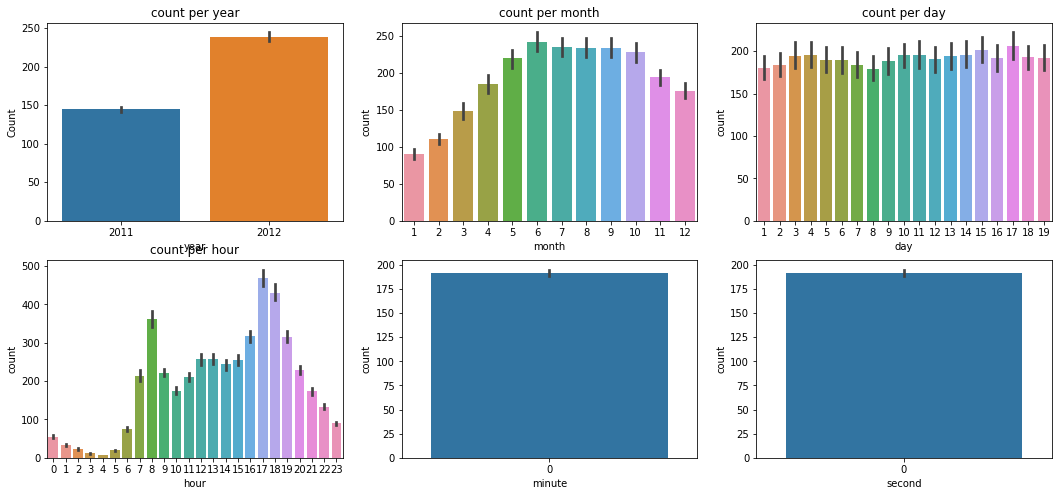

In [10]:
# 조각조각낸 연,월,일,시,분,초 가 count 와 어떤 상관관계가 있을까 ?

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='count per year')
ax2.set(xlabel='month', title='count per month')
ax3.set(xlabel='day', title='count per day')
ax4.set(xlabel='hour', title='count per hour')

- year : 2011년보다 2012년이 더 증가했다.
- month : 6월이 가장 많고 6 ~ 10이 대여량이 많다. 1월이 가장 적다.
- day : 19일까지 밖에 없어서 사용하기에 좀 곤란하다.
- hour : 8, 17,18과 그 앞뒤로 사용량이 많다. 아마도 출퇴근 시간일듯하다.
- minute, second 는 모두 0 이라서 의미 없다.

이걸 이대로 해석하기에는 좀 곤란하다.
- month : 계절로 나눠서 보는게 가능할까 ?
- day : 19까지밖에 없어서 날짜로 보는건 곤란하고 요일로 나눠서 보는건 어떨까 ?
- hour : 주중, 휴일로 나눠보는건 어떨까 ?

라고 생각을 했는데 이미 원래 데이터에 계절, 주중/휴일 구분이 되어 있다.

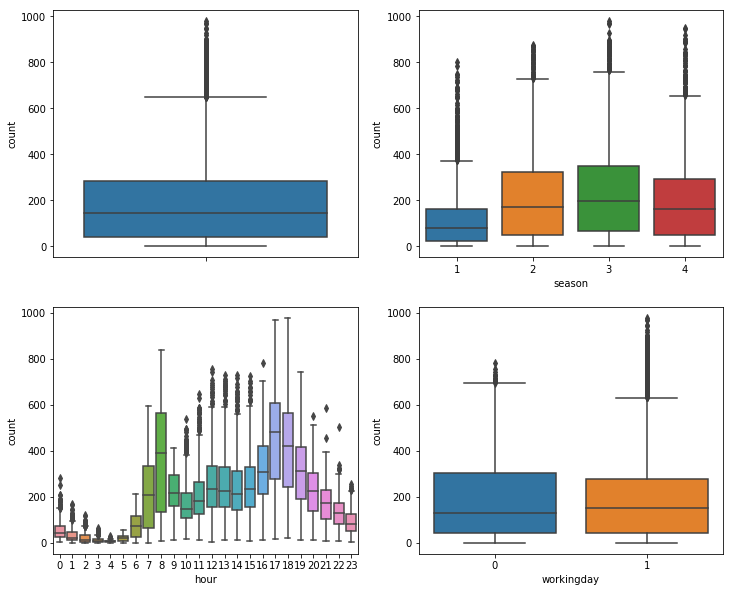

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])

- season : 가을 > 여름 > 겨울 > 봄 순으로 많다.
- workingday : 휴일이 많이 탄게 맞나 ??? 평일이 outlier가 더 많은것 같다.

In [12]:
# workingday 값이 있지만... 그래도 datetime을 dayofweek으로 한번 나눠보자.

train['dayofweek'] = train.datetime.dt.dayofweek
train.dayofweek.value_counts()      

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

7개의 요일이 골고루 있어서 데이터로 사용하기 좋다.

이제 각 시간별 count를 workingday, dayofweek, weather, season 별로 한번 보자.

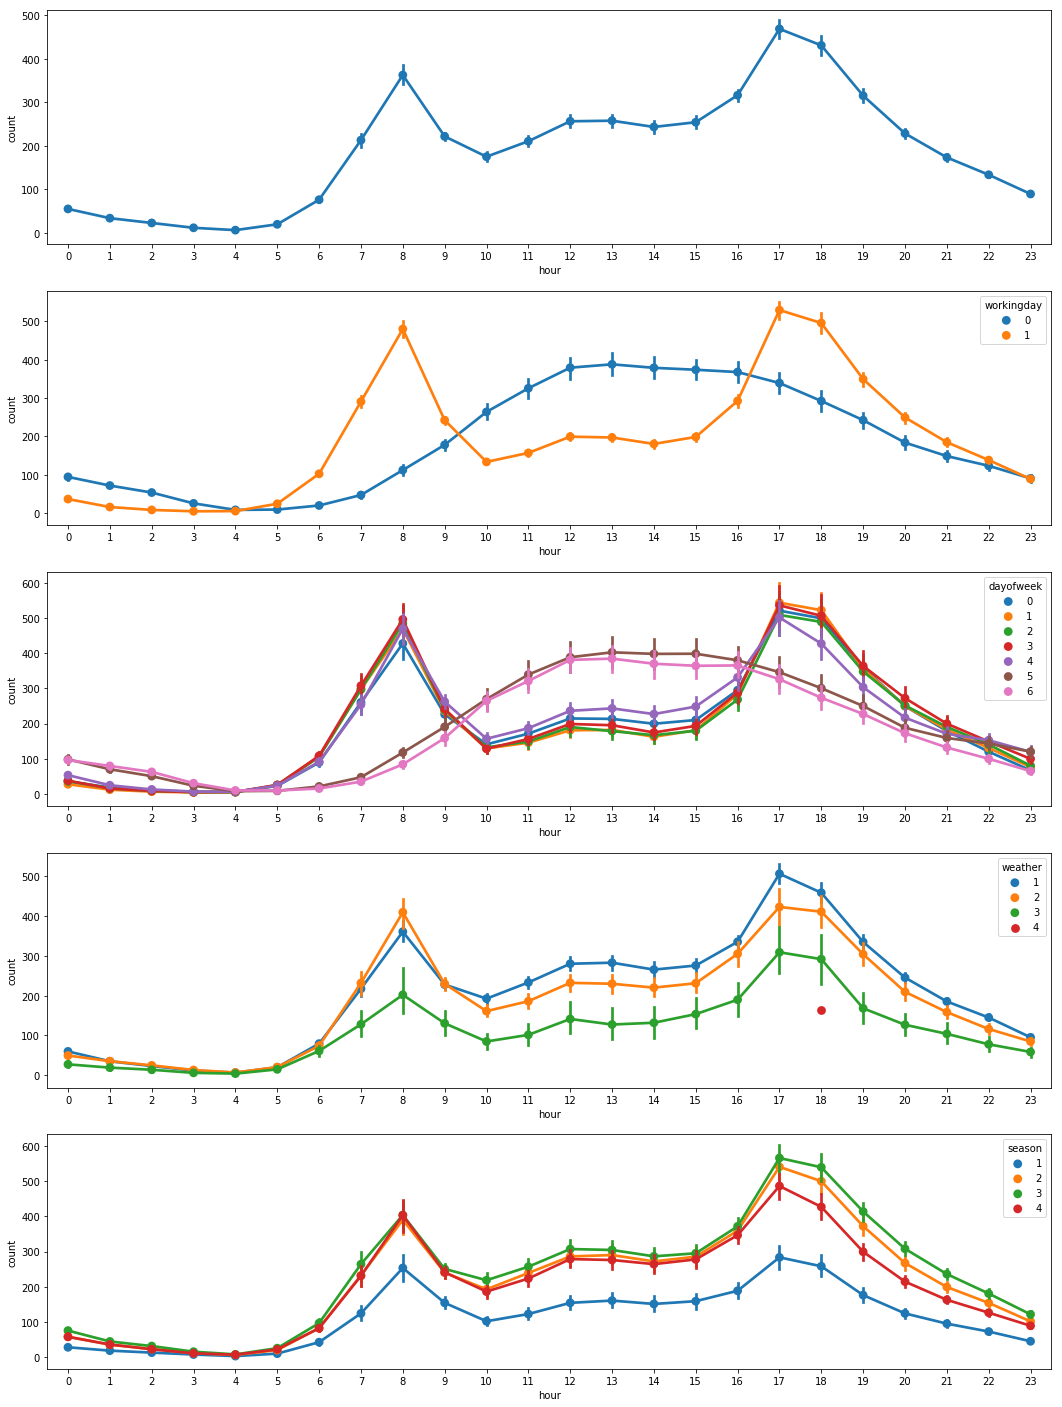

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [15]:
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt.head()

,temp,atemp,casual,registered,humidity,windspeed,count
0,9.84,14.395,3,13,81,0.0,16
1,9.02,13.635,8,32,80,0.0,40
2,9.02,13.635,5,27,80,0.0,32
3,9.84,14.395,3,10,75,0.0,13
4,9.84,14.395,0,1,75,0.0,1


In [16]:
corrMatt = corrMatt.corr()
corrMatt

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


In [17]:
mask = np.array(corrMatt)
mask

array([[ 1.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.98494811,  1.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.46709706,  0.46206654,  1.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.31857128,  0.31463539,  0.49724969,  1.        , -0.26545787,
         0.09105166,  0.97094811],
       [-0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
        -0.31860699, -0.31737148],
       [-0.01785201, -0.057473  ,  0.09227619,  0.09105166, -0.31860699,
         1.        ,  0.10136947],
       [ 0.39445364,  0.38978444,  0.69041357,  0.97094811, -0.31737148,
         0.10136947,  1.        ]])

In [18]:
mask[np.tril_indices_from(mask)] = False
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

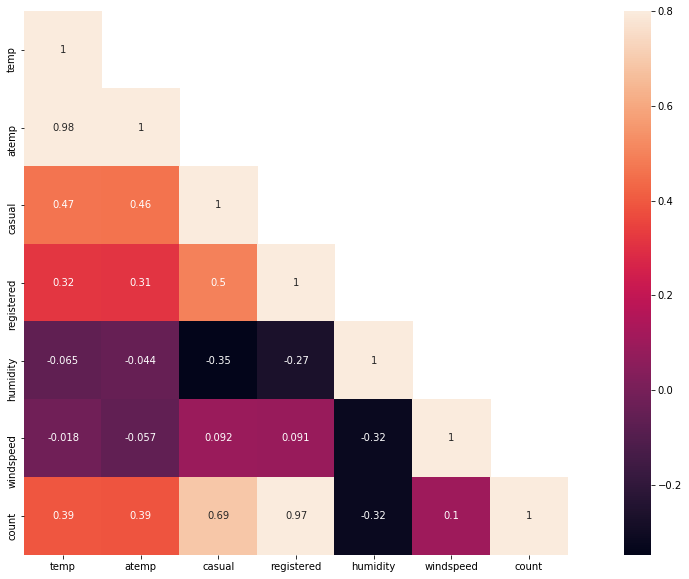

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax= 0.8, square=True, annot=True)

- 온도 (temp, atemp), 습도(humidity), 풍속(winndspeed)는 상관관계가 거의 없다.
- count와 상관관계가 있는건 casual, registered 이다.
- temp 와 atemp는 0.98로 상관관계가 매우 높지만, 둘 다 비슷한 개념다.

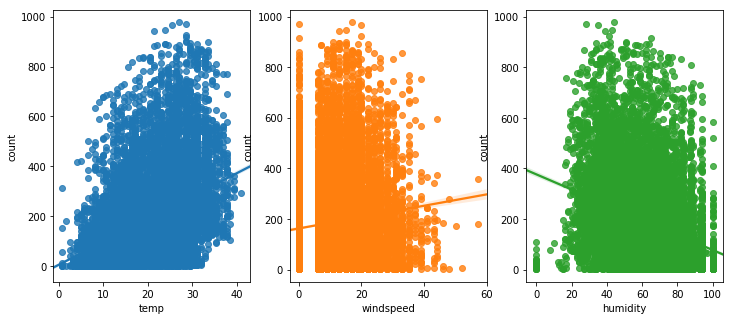

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)

windspeed 에 보면 0에 많이 갑들이 몰려있다. 아마 관측되지 않은 값이 아닐까 예상된다.

In [25]:
# 연월을 하나의 feature로 볼 수 있도록 합쳐보자.
def concat_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concat_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


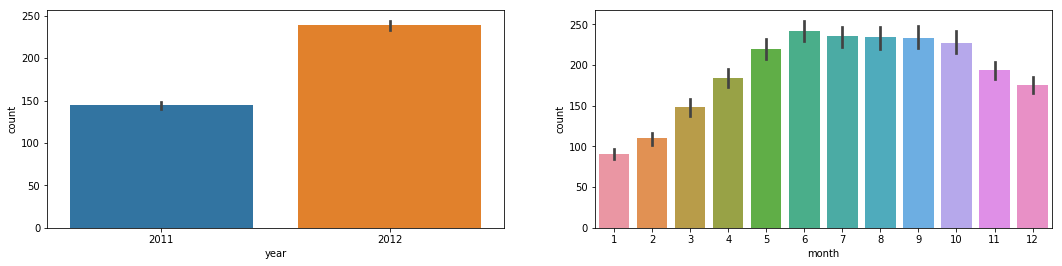

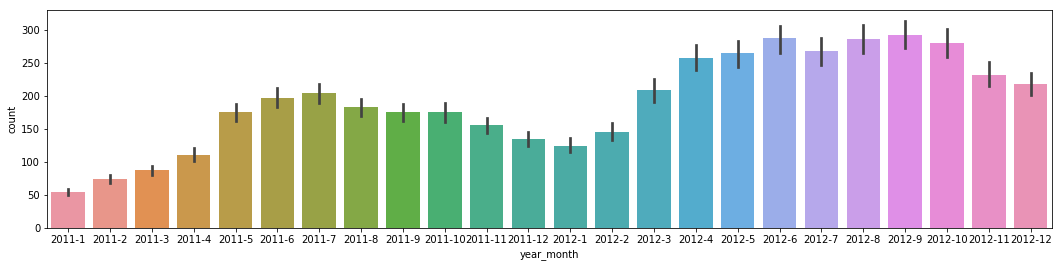

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

- 년/월 별로 보니 2012년에 더 증가하였고 겨울보다 여름이 대여량이 더 많다.
- 년월을 붙어보면 계속해서 증가하는 추세이다.

In [30]:
# train without outliers
train_without_outliers = train[np.abs(train['count'] - train['count'].mean()) <= 3 * train['count'].std()]

print(train.shape)
print(train_without_outliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229778, 4.562423868087808, 0.9581176780909615))

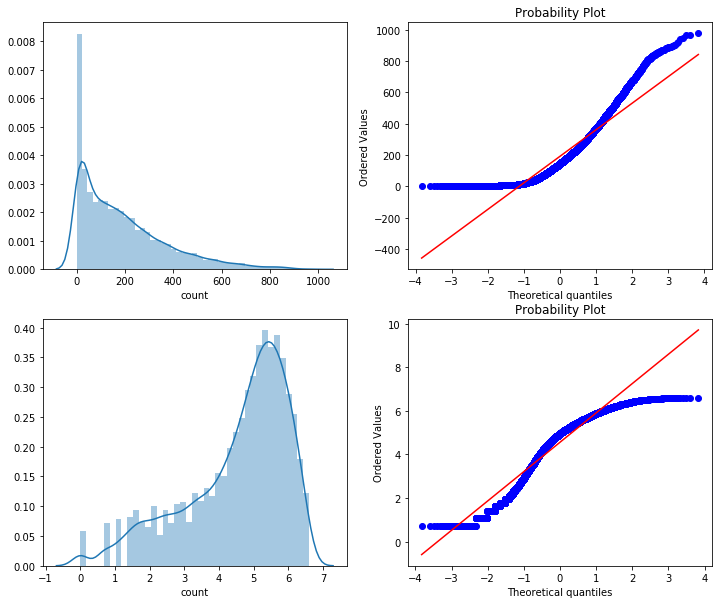

In [33]:
# count 값의 데이터 분포도 파악

fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 10)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(train_without_outliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(train_without_outliers['count']), dist='norm', fit=True, plot=axes[1][1])

원래의 count 값에 0이 많고 전체적으로 오른쪽으로 치우쳐져 있다. 그래서 std의 3배가 넘는 outlier들을 제거하고 log를 씌워보았다. 그래도 표준편차를 정확히 따르지는 않지만, 그전보다는 좀 더 고루 분포된 모양으로 되었다.